# Data distributions

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchvision.datasets import MNIST

plt.rcParams['text.usetex'] = True
plt.rcParams.update({'font.size': 22})

def plot_data_dist(settings_files):
    train_data = MNIST(root='data', train=True)
    fig, ax = plt.subplots(1, len(settings_files), figsize=(23, 5))
    alpha = [10, 1, 0.1 , 0.01]
    for j, set in enumerate(settings_files):

        settings_path = f"./settings/{set}"
        local_indices = []
        with open(f"{settings_path}/data_splits.npy", "rb") as f:
            public_indices = np.load(f)
            try:
                while True:
                    local_indices.append(np.load(f))
            except:
                pass
        
        client_targets = [train_data.targets[indices].tolist() for indices in local_indices]
        n_clients = len(client_targets)
        n_classes = 10

        label_count_matrix = np.array([[np.sum(np.array(client_targets[i]) == c) for c in range(n_classes)] for i in range(n_clients)])
        n_samples = sum(sum(label_count_matrix))
        y_values = range(n_classes)
        for i in range(n_clients):
            s = [5000*label_count_matrix[i][c]/n_samples for c in range(n_classes)]
            x_values = [i]*n_classes
            ax[j].scatter(x_values, y_values, s=s, c='blue')
        ax[j].set_xlabel('Client nr')
        ax[j].set_ylabel('Data label')
        ax[j].set_xticks(np.arange(n_clients))
        ax[j].set_yticks(np.arange(n_classes))
        ax[j].set_title(r'$\alpha={}$'.format(alpha[j]))
        ax[j].set_axisbelow(True)
        ax[j].grid()
    plt.savefig('data_example.png', dpi=300)
    plt.show()

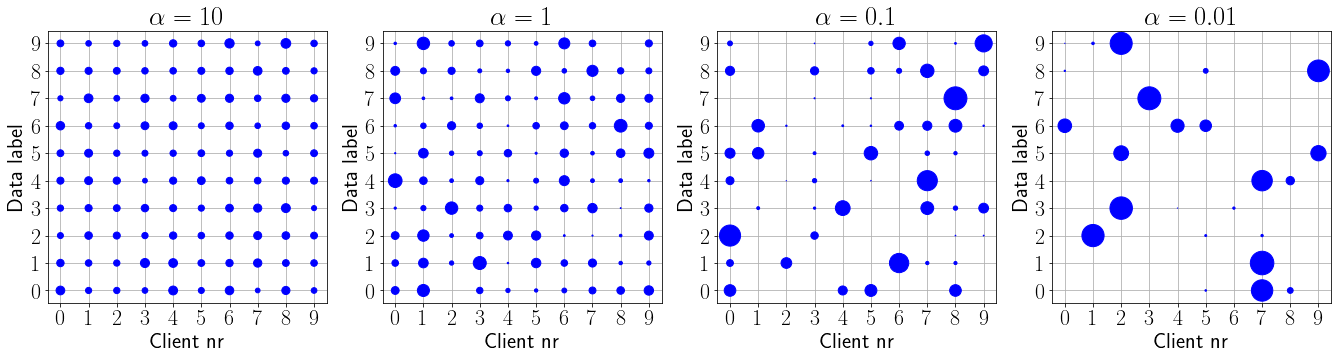

In [14]:
dists = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"] 
n_clients = 10
model = "mnist_cnn1"
settings_files = [f"{model}_c{n_clients}_{d}_s1" for d in dists]
plot_data_dist(settings_files)

# MNIST training plots

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc

rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('text', usetex=True)
sns.set_theme()
sns.set(font_scale=1.5, style="whitegrid")

from src.datasets.mnist import Mnist

                                                

In [63]:
distribution = "niid0.01"
seeds = [1,2,3,4,5]
n_clients = 10
model = "mnist_cnn1"

settings_files = [f"{model}_c{n_clients}_{distribution}_s{i}" for i in seeds]

# Local training accuracy

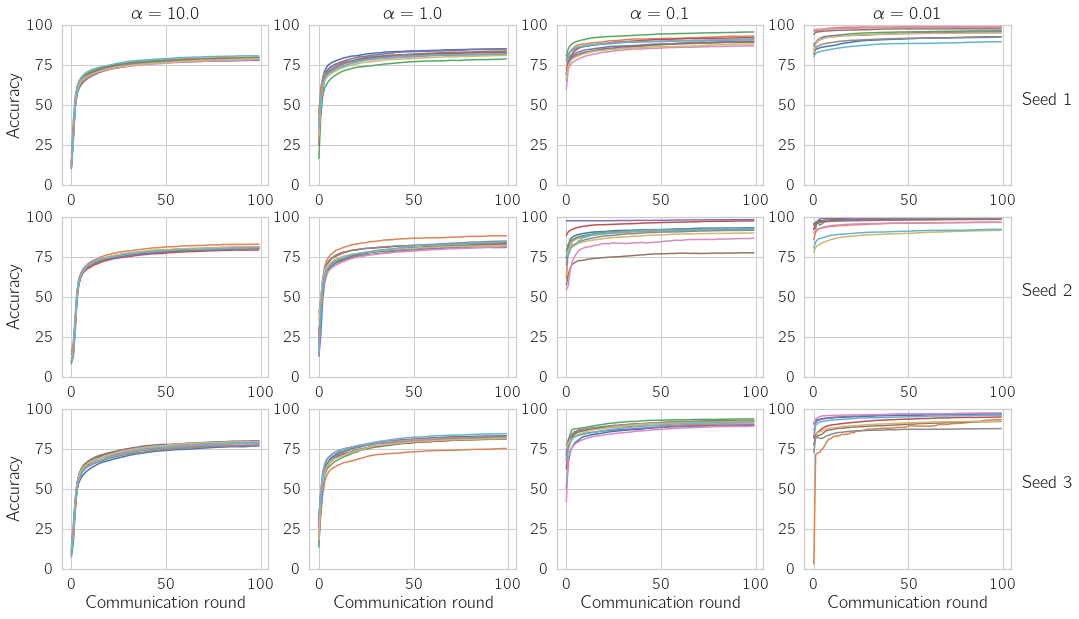

In [43]:
alg = "fedavg"
distribution = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]
seeds = [1,2,3]
n_clients = 10
model = "emnist_cnn1"

ylim = [0, 100]

fig, ax = plt.subplots(len(seeds), 4, figsize=(17,10))

for i, d in enumerate(["niid10.0", "niid1.0", "niid0.1", "niid0.01"]):
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]

    dataset = settings_files[0].split('_')[0]

    ax[0][i].set_title(r"$\alpha = {}$".format(d[4:]))
    
    
    for j, set in enumerate(settings_files):
        results_path = f"results/{dataset}/{alg}/{set}"
        client_accs = []
        with open(f"{results_path}/client_accuracy.npy", "rb") as f:
            try:
                while True:
                    client_accs.extend([np.load(f)])
            except:
                pass

        client_losses = []
        with open(f"{results_path}/client_loss.npy", "rb") as f:
            try:
                while True:
                    client_losses.extend([np.load(f)])
            except:
                pass

        for accs in client_accs:
            ax[j][i].plot(accs)

        ax[j][0].set_ylabel("Accuracy")
        ax[j][i].set_ylim(ylim)
        ax[-1][i].set_xlabel("Communication round")

y_start = int((ylim[1]-ylim[0])*0.50)
y_step = int(y_start*2.4)
x_start = int(len(client_accs[0])*1.1)
plt.text(x_start,y_start, "Seed 3")
plt.text(x_start, y_start+y_step, "Seed 2")
plt.text(x_start, y_start+2*y_step, "Seed 1")

plt.savefig(f"../thesis_images/{dataset}_{alg}_clients.png", dpi=300)
plt.show()  

# Test accuracy (fedavg+fedprox)

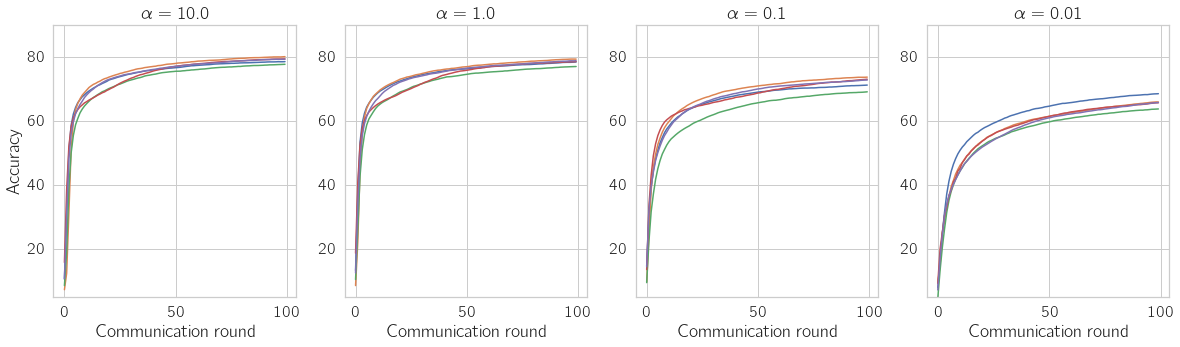

In [23]:
alg = "fedavg"
distribution = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]
seeds = [1,2,3,4,5]
n_clients = 10
model = "emnist_cnn1"

ylim = [5,90]
fig, ax = plt.subplots(1, 4, figsize=(20,5))
ax[0].set_ylabel("Accuracy")
for i, d in enumerate(distribution):
    settings_files = [f"{model}_c{n_clients}_{d}_s{i}" for i in seeds]
    
    dataset = settings_files[0].split('_')[0]
    test_acc_list = []
    for set in settings_files:
        results_path = f"results/{dataset}/{alg}/{set}"

        with open(f"{results_path}/fedavg_test_results.npy", "rb") as f:
            test_accs = np.load(f)
            test_losses = np.load(f)

        ax[i].plot(test_accs)
        test_acc_list.append(test_accs[-1])
    ax[i].set_ylim(ylim)
    ax[i].set_xlabel("Communication round")
    ax[i].set_title(r"$\alpha = {}$".format(d[4:]))
plt.savefig(f"../thesis_images/{dataset}_{alg}_global.png", dpi=300)
plt.show()

# Student training

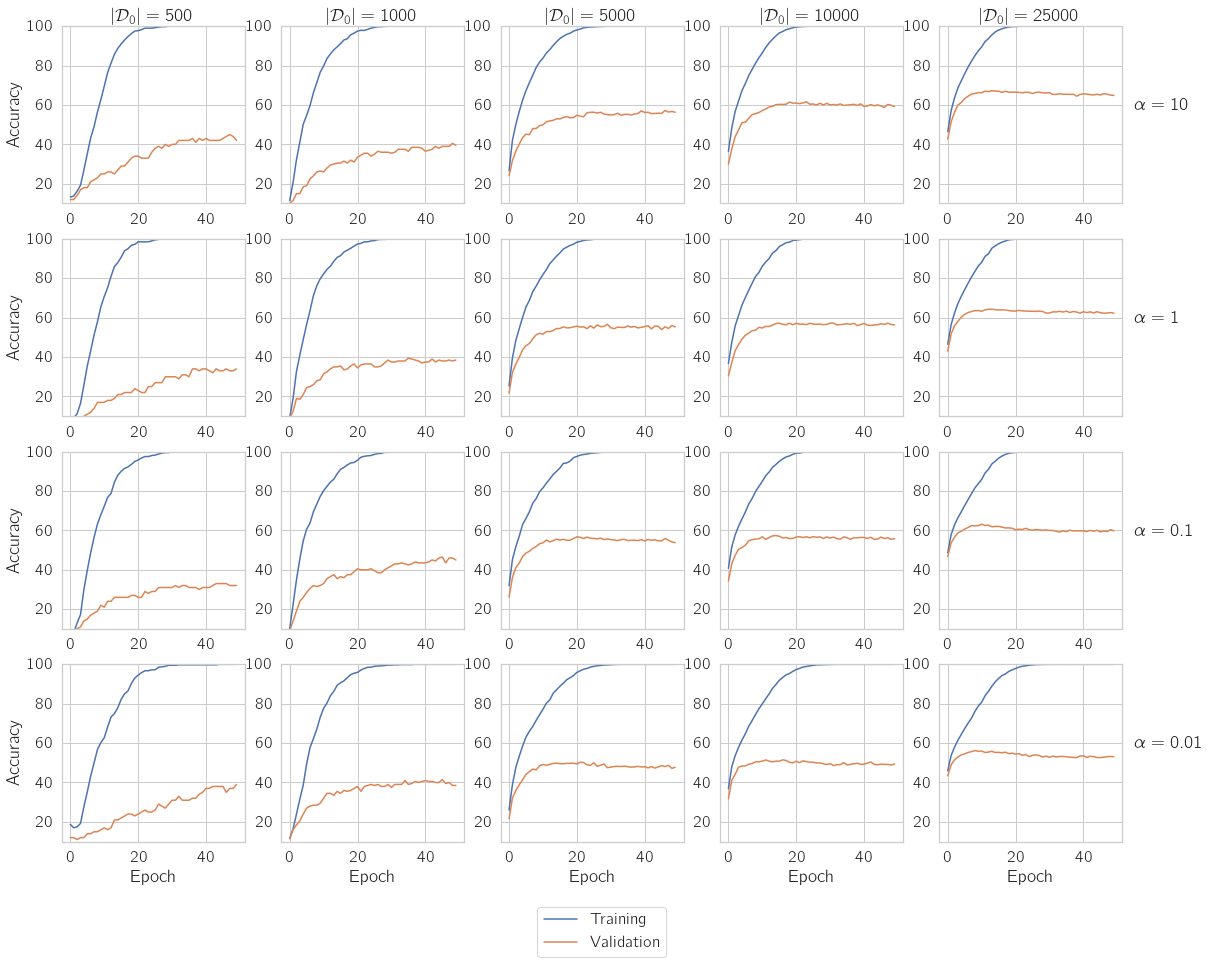

In [8]:
distribution = ["niid10.0", "niid1.0", "niid0.1", "niid0.01"]
seeds = [1,2,3,4,5]
n_clients = 10
model = "cifar10_resnet18"

settings_files = [f"{model}_c{n_clients}_{distribution}_s{i}" for i in seeds]

loss = "ce"
weight_scheme = 2
# n_pub = [500, 1000, 5000, 15000, 30000]
# n_pub = [500, 1000, 5000, 30000, 60000]
n_pub = [500, 1000, 5000, 10000, 25000]
seed = 0
student = "cifar10_resnet18"
ylim = [10, 100]
fig, ax = plt.subplots(4, len(n_pub), figsize=(19,15))

dataset = settings_files[0].split('_')[0]

for i, d in enumerate(distribution):
    set = f"{model}_c{n_clients}_{d}_s{seed}"
    results_path = f"results/{dataset}/feded/{set}/w{weight_scheme}_student_{student}_{loss}"

    ax[i][0].set_ylabel("Accuracy")
    for j, n in enumerate(n_pub):
        with open(f"{results_path}_train_results_{n}.npy", "rb") as f:
            train_accs = np.load(f)
            train_losses = np.load(f)
            val_accs = np.load(f)
            val_losses = np.load(f)

        with open(f"{results_path}_test_results_{n}.npy", "rb") as f:
            test_results = np.load(f)

        ax[i][j].plot(train_accs)
        ax[i][j].plot(val_accs)
        ax[i][j].set_ylim(ylim)
        ax[-1][j].set_xlabel("Epoch")
        ax[0][j].set_title(r"$|\mathcal{D}_0|=$" + f" {n}")

ax[-1][-1].legend(["Training", "Validation"], loc=(-2.2,-0.65))

y_start = int((ylim[1]-ylim[0])*0.64)
y_step = int(y_start*1.9)
x_start = int(len(train_accs)*1.1)
plt.text(x_start,y_start, r"$\alpha=0.01$")
plt.text(x_start, y_start+y_step, r"$\alpha=0.1$")
plt.text(x_start, y_start+2*y_step, r"$\alpha=1$")
plt.text(x_start, y_start+3*y_step, r"$\alpha=10$")

plt.savefig(f"../thesis_images/{dataset}_feded_student_{student}_w{weight_scheme}_{loss}.png", dpi=300)
plt.show()
